In [ ]:
!pip install nltk -q
!pip install gensim -q
!pip install wordcloud -q
!pip install emoji -q
!python -m spacy download pt_core_news_sm -q

     |████████████████████████████████| 197 kB 4.0 MB/s 
2022-09-15 23:59:33.048502: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 13.0 MB 2.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
# IMPORTAÇÃO DAS BIBLIOTECAS
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd 
import numpy as np 
import string
import re
import nltk
import emoji
import spacy 
nltk.download('punkt')
nltk.download('stopwords')
pd.options.mode.chained_assignment = None  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LEITURA DO DATAFRAME COM PANDAS
data = pd.read_csv('/content/drive/MyDrive/PesquisaCovid/db_lemmatizado/db_2020-02-01_2020-03-31__lematizado.csv', 
                   engine='python')

In [ ]:
data = data.loc[0:1000]
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,_type,url,date,content,renderedContent,id,user,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,content_lemmatizada
0,0,0,0,snscrape.modules.twitter.Tweet,https://twitter.com/nath_salles/status/1244776...,2020-03-30 23:59:57+00:00,Quero pagodearrrrrr\nCovid 19 sua estranha \nJ...,Quero pagodearrrrrr\nCovid 19 sua estranha \nJ...,1.244776e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,querer pagodearrrrrr \n Covid 19 seu estranho ...
1,1,1,1,snscrape.modules.twitter.Tweet,https://twitter.com/hcosta155/status/124477615...,2020-03-30 23:58:57+00:00,@matheusdush Esqueci até do Covid-19 kkkk,@matheusdush Esqueci até do Covid-19 kkkk,1.244776e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,1.244774e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,@matheusdush Esqueci até de o Covid-19 kkkk
2,2,2,2,snscrape.modules.twitter.Tweet,https://twitter.com/Ricardo__Dantas/status/124...,2020-03-30 23:58:11+00:00,To aqui assistindo a @GloboNews o programa Em ...,To aqui assistindo a @GloboNews o programa Em ...,1.244776e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['Covid_19'],NaN,To aqui assistir a @GloboNews o programa em Pa...
3,3,3,3,snscrape.modules.twitter.Tweet,https://twitter.com/moscouamosca/status/124477...,2020-03-30 23:58:04+00:00,cada atualização de mortos do covid-19 = batid...,cada atualização de mortos do covid-19 = batid...,1.244776e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,cada atualização de morto de o covid-19 = bate...
4,4,4,4,snscrape.modules.twitter.Tweet,https://twitter.com/AfacCasa/status/1244775788...,2020-03-30 23:57:29+00:00,Com atual crise no setor aéreo causado pelo Co...,Com atual crise no setor aéreo causado pelo Co...,1.244776e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,com atual crise em o setor aéreo causar por o ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,996,996,snscrape.modules.twitter.Tweet,https://twitter.com/prcleidirlisboa/status/124...,2020-03-30 08:09:30+00:00,#Meu coração está firme em Ti Senhor!!!\n#prim...,#Meu coração está firme em Ti Senhor!!!\n#prim...,1.244537e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['Meu', 'primeiroDeus', 'viralizeesperança', '...",NaN,# meu coração estar firme em Ti Senhor ! ! ! \...
997,997,997,997,snscrape.modules.twitter.Tweet,https://twitter.com/Rodrigo_AFM/status/1244536...,2020-03-30 08:07:14+00:00,Vão fazer as pessoas se excluirem do mundo com...,Vão fazer as pessoas se excluirem do mundo com...,1.244537e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",...,NaN,NaN,1.244537e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,Vão fazer o pessoa se excluir de o mundo com m...
998,998,998,998,snscrape.modules.twitter.Tweet,https://twitter.com/Rodrigo_AFM/status/1244536...,2020-03-30 08:07:12+00:00,"Mano olha isso,mano minha esposa está grávida ...","Mano ol

In [ ]:
# FUNÇÕES PARA CONTAGEM DE TWEETS DE ACORDO COM USUÁRIO

# Função para filtrar a conta do usuário 
def filtra_users(text):
  aux = 0
  posicao = 0
  text_temp = str(text)
  text_temp = text_temp.split()
  for word in text_temp:
    aux = aux + 1
    if (word == "'username':"):
      posicao = aux
  text_temp = text_temp[posicao]
  text_temp = re.sub(r"[',]", ' ', text_temp)
  return text_temp

# Função para agrupar todos os usuários em um único arquivo de texto
all_users = []
def agrupa_users(text):
  all_users.append(text)

# Função para contar todos os usuários em um único arquivo de texto
def conta_tweets_user(text): 
  text_temp = text.strip()
  str_all_users = ''.join(all_users)
  return str_all_users.count(text_temp)

In [ ]:
# REALIZANDO A CONTAGEM DE TWEETS POR USUÁRIO
# ATENÇÃO: A CELULA DEVE SER EXECUTADA UMA ÚNICA VEZ POR ACESSO

# Renomeando a coluna content_lemmatizada em full_text
data = data.rename(columns={'content_lemmatizada': 'full_text'})

# Criação de um novo dataframe com os dados do usuário
df = data[['full_text','user']]

# Aplicando a função para filtrar o nome de usuário dos dados
df['conta'] = df['user'].apply(filtra_users)

# Entrada de dados para agrupamento de todos os usuários
df['conta'].apply(agrupa_users)

# Função para contagem dos usúarios no agrupamento
df['qnt_tweets'] = df['conta'].apply(conta_tweets_user)

df

,full_text,user,conta,qnt_tweets
0,querer pagodearrrrrr \n Covid 19 seu estranho ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",nath_salles,1
1,@matheusdush Esqueci até de o Covid-19 kkkk,"{'_type': 'snscrape.modules.twitter.User', 'us...",hcosta155,1
2,To aqui assistir a @GloboNews o programa em Pa...,"{'_type': 'snscrape.modules.twitter.User', 'us...",Ricardo__Dantas,9
3,cada atualização de morto de o covid-19 = bate...,"{'_type': 'snscrape.modules.twitter.User', 'us...",moscouamosca,1
4,com atual crise em o setor aéreo causar por o ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",AfacCasa,1
...,...,...,...,...
996,# meu coração estar firme em Ti Senhor ! ! ! \...,"{'_type': 'snscrape.modules.twitter.User', 'us...",prcleidirlisboa,1
997,Vão fazer o pessoa se excluir de o mundo com m...,"{'_type': 'snscrape.modules.twitter.User', 'us...",Rodrigo_AFM,2
998,"Mano olhar isso , mano meu esposo estar grávid...","{'_type': 'snscrape.modules.twitter.User', 'us...",Rodrigo_AFM,2
999,o SISGRAN estar mapeando e atualizar quase que...,"{'_type': 'snscrape.modules.twitter.User', 'us...",carinacarvalho_,1


In [ ]:
# TRATAMENTO E VISUALIZAÇÃO DA QUANTIDADE DE TWEETS POR USUÁRIO

# Eliminando os dados duplicados 
new_df = df.drop_duplicates(subset=['conta'])

# Colocando os dados em ordem decrescente de acordom com a qtd de tweets
result_new_df = new_df[['conta','qnt_tweets']].sort_values(by=['qnt_tweets'], ascending=False)
result_new_df.reset_index(drop = True, inplace=True)

# Imprmindo os 10 primeiros resultados
#print(result_new_df.head(10))
#print(' ')

# Contando quantos usuários diferentes existem no dataframe
print('Existem '+str(result_new_df.conta.count())
      +' usuários no dataframe')

# Contando quantos usuários tem 1 tweet no dataframe
filtro_1 = result_new_df['qnt_tweets'] < 2
new_result_1 = result_new_df[filtro_1]
print(str(new_result_1.conta.count()) + ' usuários tem 1 tweet')

# Contando quantos usuários tem mais de 5 tweets no dataframe
filtro_5 = result_new_df['qnt_tweets'] >= 5 
new_result_5 = result_new_df[filtro_5]
print(str(new_result_5.conta.count()) + ' usuários tem 5 ou mais tweets')

# Contando quantos usuários tem mais de 10 tweets no dataframe
filtro_10 = result_new_df['qnt_tweets'] >= 10
new_result_10 = result_new_df[filtro_10]
print(str(new_result_10.conta.count()) + ' usuários tem 10 ou mais tweets')

result_new_df

Existem 868 usuários no dataframe
776 usuários tem 1 tweet
3 usuários tem 5 ou mais tweets
0 usuários tem 10 ou mais tweets


,conta,qnt_tweets
0,Ricardo__Dantas,9
1,servicob10,8
2,Adriano04124722,7
3,fernanda_saboia,4
4,CledirRocha,4
...,...,...
863,LILKIRA777,1
864,alfacruz3,1
865,djburymarssal,1
866,rafaeldias17,1


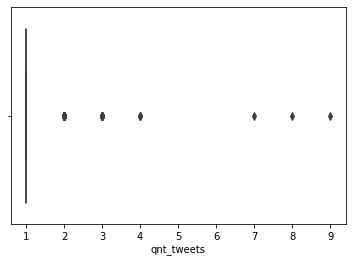

In [ ]:
# IPRIMINDO O BOXPLOT COM A QUANTIDADE DE TWEETS POR USUÁRIO
sns.boxplot(x=result_new_df["qnt_tweets"])

In [ ]:
# FUNÇÕES PARA FILTRAR OS TWEETS DE ACORDO COM O USUÁRIO DE NOTÍCIA

# Função para selecionar e classificar os tweets como notícias
def select_contas_news(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return text
  else:
    return 'codigo_tweet_news'

In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM O USUÁRIO
# FILTRAGEM MANUAL REALIZADA PELO DIANSLEY

# Adicionando os usuários que terão os tweets apagados
users_news = []

# Passando a lista de usuários para minúscula
new_users_news = []
for word in users_news:
  word = word.lower()
  new_users_news.append(word)

# Aplicação da função para filtrar os contas de notícias
new_data = data[['full_text','user']]
new_data['user'] = new_data['user'].apply(select_contas_news, lista=new_users_news)

# Filtra os tweets que não são de noticías
filtro = new_data.user!='codigo_tweet_news'
result_data_news = new_data[filtro]

# Reset do indice do dataframe 
result_data_news.reset_index(drop = True, inplace=True)
result_data_news['user'] = result_data_news['user'].apply(filtra_users)

result_data_news

,full_text,user
0,querer pagodearrrrrr \n Covid 19 seu estranho ...,nath_salles
1,@matheusdush Esqueci até de o Covid-19 kkkk,hcosta155
2,To aqui assistir a @GloboNews o programa em Pa...,Ricardo__Dantas
3,cada atualização de morto de o covid-19 = bate...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
996,# meu coração estar firme em Ti Senhor ! ! ! \...,prcleidirlisboa
997,Vão fazer o pessoa se excluir de o mundo com m...,Rodrigo_AFM
998,"Mano olhar isso , mano meu esposo estar grávid...",Rodrigo_AFM
999,o SISGRAN estar mapeando e atualizar quase que...,carinacarvalho_


In [ ]:
# FUNÇÕES PARA FILTRAR OS TWEETS DE ACORDO COM OS USUÁRIOS BOTS

# Função para selecionar e classificar os tweets como notícias
def select_contas_bots(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return text
  else:
    return 'codigo_tweet_bots'

def compara_listas(lista1, lista2):
    usuarios_noticias = []
    contador = 0
    for word1 in lista1:
      if word1 in lista2:
        contador = contador + 1
    print('Existe '+str(contador)+' correspondências entres as listas'+ 
    ' de usuários de nóticia e usuários bots')


In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM O USUÁRIO BOTS
# FILTRAGEM MANUAL REALIZADA PELO GEAN ATRAVÉS DO BOTOMETER

# Adicionando os usuários que terão os tweets apagados
users_bots = []               

# Passando a lista de usuários para minúscula
new_users_bots = []
for word in users_bots:
  word = word.lower()
  new_users_bots.append(word)

# Comparando as correspondências entre as listas de notícias com bots
compara_listas(lista1=users_news, lista2=users_bots)

# Aplicação da função para filtrar os contas de notícias
result_data_news['user'] = result_data_news['user'].apply(select_contas_bots, lista=new_users_bots)

# Filtra os tweets que não são de noticías
filtro = result_data_news.user!='codigo_tweet_bots'
result_data_bots = result_data_news[filtro]

# Reset do indice do dataframe 
result_data_bots.reset_index(drop = True, inplace=True)

result_data_bots

Existe 0 correspondências entres as listas de usuários de nóticia e usuários bots


,full_text,user
0,querer pagodearrrrrr \n Covid 19 seu estranho ...,nath_salles
1,@matheusdush Esqueci até de o Covid-19 kkkk,hcosta155
2,To aqui assistir a @GloboNews o programa em Pa...,Ricardo__Dantas
3,cada atualização de morto de o covid-19 = bate...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
996,# meu coração estar firme em Ti Senhor ! ! ! \...,prcleidirlisboa
997,Vão fazer o pessoa se excluir de o mundo com m...,Rodrigo_AFM
998,"Mano olhar isso , mano meu esposo estar grávid...",Rodrigo_AFM
999,o SISGRAN estar mapeando e atualizar quase que...,carinacarvalho_


In [ ]:
# BOXPLOT DATAFRAME APÓS REALIZR A ELIMINAÇÃO DOS USUÁRIOS DE NOTÍCIAS E BOTS

# Função para contagem dos usúarios no agrupamento
df_boxplot = result_data_bots
df_boxplot['qnt_tweets'] = df_boxplot['user'].apply(conta_tweets_user)

# Eliminando os dados duplicados 
df_boxplot = df_boxplot.drop_duplicates(subset=['user'])

# Colocando os dados em ordem decrescente de acordom com a qtd de tweets
df_boxplot = df_boxplot[['user','qnt_tweets']].sort_values(by=['qnt_tweets'], ascending=False)
df_boxplot.reset_index(drop = True, inplace=True)

# IMPRIMINDO A TABELA COM OS USUÁRIOS APÓS A LIMPEZA
df_boxplot

,user,qnt_tweets
0,Ricardo__Dantas,9
1,servicob10,8
2,Adriano04124722,7
3,fernanda_saboia,4
4,CledirRocha,4
...,...,...
863,LILKIRA777,1
864,alfacruz3,1
865,djburymarssal,1
866,rafaeldias17,1


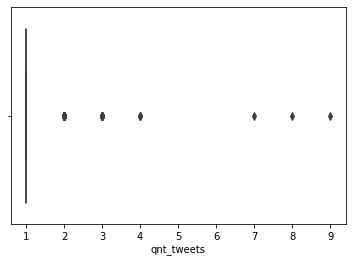

In [ ]:
# IPRIMINDO O BOXPLOT APÓS A LIMPEZA DE USUÁRIOS
sns.boxplot(x=df_boxplot["qnt_tweets"])

In [ ]:
# FUNÇÃO PARA CONVERSÃO DE EMOJIS EM STRINGS

# Função para converção de emojis em strings
def convert_emojis(text):
  text_temp = emoji.demojize(str(text), language='pt')
  return text_temp

In [ ]:
# CONVERTENDO OS EMOJIS EM STRINGS

# Aplicando a função de conversão de strings
result_data_bots = result_data_bots[['full_text', 'user']]
result_data_bots['full_text'] = result_data_bots['full_text'].apply(convert_emojis)

# Tratamento das string geradas na conversão dos emojis
result_data_bots['full_text'] = result_data_bots['full_text'].str.replace(':',' ')

result_data_bots

,full_text,user
0,querer pagodearrrrrr \n Covid 19 seu estranho ...,nath_salles
1,@matheusdush Esqueci até de o Covid-19 kkkk,hcosta155
2,To aqui assistir a @GloboNews o programa em Pa...,Ricardo__Dantas
3,cada atualização de morto de o covid-19 = bate...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
996,# meu coração estar firme em Ti Senhor ! ! ! \...,prcleidirlisboa
997,Vão fazer o pessoa se excluir de o mundo com m...,Rodrigo_AFM
998,"Mano olhar isso , mano meu esposo estar grávid...",Rodrigo_AFM
999,o SISGRAN estar mapeando e atualizar quase que...,carinacarvalho_


In [ ]:
# FUNÇÃO PARA LIMPEZA DOS TWEETS 
def cleaning_text(text):
  punctuation_stand = string.punctuation # Pontuações
  punctuation_others = re.compile('<.*?>') # Pontos
  urls = re.compile(r'@[a-z0-9_]+|http\S+|www\.\S+') # Usuários e url's
  text_temp = text.lower()
  text_temp = punctuation_others.sub(r'', text_temp)
  text_temp = text_temp.translate(str.maketrans('', '', string.digits)) #removendo numeros
  text_temp = urls.sub(r'', text_temp)
  text_temp = text_temp.translate(str.maketrans('','',punctuation_stand))
  return text_temp

In [ ]:
# LIMPEZA DOS TWEETS

result_data_bots['full_text'] = result_data_bots['full_text'].apply(cleaning_text)

result_data_bots

,full_text,user
0,querer pagodearrrrrr \n covid seu estranho \n...,nath_salles
1,esqueci até de o covid kkkk,hcosta155
2,to aqui assistir a o programa em pauta e ima...,Ricardo__Dantas
3,cada atualização de morto de o covid bater e ...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
996,meu coração estar firme em ti senhor \n p...,prcleidirlisboa
997,vão fazer o pessoa se excluir de o mundo com m...,Rodrigo_AFM
998,mano olhar isso mano meu esposo estar grávida...,Rodrigo_AFM
999,o sisgran estar mapeando e atualizar quase que...,carinacarvalho_


In [ ]:
# FUNÇÃO PARA SUBSTITUIÇÃO DAS PALAVRAS
def converte_palavras(palavra):
  if palavra and palavra == 'n':
    return 'nao'
  elif palavra and palavra == 'hj':
    return 'hoje'
  elif palavra and ('kk' in palavra or 'rsrs' in palavra or 'rs' == palavra or 'haha' in palavra or 'hehe' in palavra):
    return 'risos'
  elif palavra and palavra == 'nd':
    return 'nada'
  elif palavra and palavra == 'ngm':
    return 'ninguem'
  elif palavra and palavra == 'pq':
    return 'porque'
  elif palavra and palavra == 'obg':
    return 'obrigado'
  elif palavra and palavra == 'sextou':
    return 'sexta'
  elif palavra and palavra == 'sdd':
    return 'saudade'
  elif palavra and palavra == 'mt':
    return 'muito'
  elif palavra and palavra == 'tmj':
    return 'juntos'
  elif palavra and palavra == 'pfvr':
    return 'favor'
  elif palavra and palavra == 'bb':
    return 'bebe'
  elif palavra and palavra == 'víru':
    return 'virus'
  elif palavra and (palavra == 'tá' or palavra == 'ta'):
    return 'esta'
  elif palavra and (palavra == 'tô' or palavra == 'to'):
    return 'estou'
  elif palavra and (palavra == 'udi' or palavra == 'udia'):
    return 'uberlandia'
  else:
    return palavra

# FUNÇÃO PARA CHAMAR A FUNÇÃO DE SUBSTITUIÇAO DAS PALAVRAS
def substitui_palavras(text):
  text_temp = text.split()
  result = [converte_palavras(word) for word in text_temp]
  return ' '.join(result)

# CONVERSÃO DAS PALAVRAS
result_data_bots['full_text'] = result_data_bots['full_text'].apply(substitui_palavras)
result_data_bots

,full_text,user
0,querer pagodearrrrrr covid seu estranho já pod...,nath_salles
1,esqueci até de o covid risos,hcosta155
2,estou aqui assistir a o programa em pauta e im...,Ricardo__Dantas
3,cada atualização de morto de o covid bater e a...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
996,meu coração estar firme em ti senhor primeirod...,prcleidirlisboa
997,vão fazer o pessoa se excluir de o mundo com m...,Rodrigo_AFM
998,mano olhar isso mano meu esposo estar grávida ...,Rodrigo_AFM
999,o sisgran estar mapeando e atualizar quase que...,carinacarvalho_


In [ ]:
# Conta palavras antes do processo de eliminação de palavras 0,5% e 90%
texto = []
def criaTexto(text):
  text_temp = str(text)
  texto.append(text_temp)
  return texto

nuvem_palavras_1 = result_data_bots['full_text'].apply(criaTexto)
new_texto = str(texto).strip('[]')
len(new_texto)

162143

In [ ]:
def contemPalavraTweet(new_tweet, palavra):
  if palavra in new_tweet:
      return palavra
  else:
      return 'codigo'

# Função para selecionar e classificar os tweets como notícias
def contaQuantidade(palavra, new_tweet):
  df = new_tweet.apply(contemPalavraTweet, palavra=palavra)
  filtro = df!='codigo'
  new_df = df[filtro]
  contador = new_df.count()
  return contador
  

def selecionaDados(tweet):
  tweet_return = []
  temp = str(tweet)
  temp = temp.split()
  new_tweet = result_data_bots['full_text']
  len_df = result_data_bots['full_text'].count()
  for palavra in temp:
    cont = contaQuantidade(palavra, new_tweet)
    if (cont < len_df*0.9):
      if (cont > len_df*0.005):
        tweet_return.append(palavra)
  return ' '.join(tweet_return)

result_data_bots['full_text'] = result_data_bots['full_text'].apply(selecionaDados)

In [ ]:
# Conta palavras após o processo de eliminação de palavras 0,5% e 90%
texto = []
def criaTexto(text):
  text_temp = str(text)
  texto.append(text_temp)
  return texto

nuvem_palavras_1 = result_data_bots['full_text'].apply(criaTexto)
new_texto = str(texto).strip('[]')
new_texto

"'querer pagodearrrrrr seu estranho já poder ir embora', 'esqueci até risos', 'estou aqui assistir programa em pauta imaginar se gado poder assistir isso agora em todo brasil bozo apanhar feio tônica ser isolamento politico ele iriam surtar ver risos', 'cada atualização morto bater assobio tordo anunciar morte tributo tcowggbeqmrny', 'com atual crise em setor aéreo causar por muito aeronave se encontro em solo por mundo como se sentir então controlador tráfego aéreo foto resumar bem acc centro controle área app controle aproximação twr torre controle tcowpkssdeguk'"

In [ ]:
# FUNÇÃO PARA FILTRAR OS TWEETS DE ACORDO COM DETERMINADA ENTRADA 

# Função para selecionar e classificar os tweets
def select_tweet_input(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return ' '.join(result)
  else:
    return 'codigo_tweet_selected'

In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM PALAVRAS NO TEXTO
# Ex: Tweets que contenha a palavra BBB ou algum participante

# Adicionando as palavras que serão filtradas
words_input = []

# Tranformando o result_data_bots em result_clean 
result_clean = result_data_bots

# Aplicando a função para seleção dos 
result_clean['full_text'] = result_clean['full_text'].apply(select_tweet_input, lista=words_input)

# Filtra os tweets que não foram selecionados
filtro = result_clean.full_text!='codigo_tweet_selected'
result_remove = result_clean[filtro]

# Reset do indice do dataframe 
result_remove.reset_index(drop = True, inplace=True)

result_remove

,full_text,user
0,querer pagodearrrrrr covid seu estranho já pod...,nath_salles
1,esqueci até de o covid risos,hcosta155
2,estou aqui assistir a o programa em pauta e im...,Ricardo__Dantas
3,cada atualização de morto de o covid bater e a...,moscouamosca
4,com atual crise em o setor aéreo causar por o ...,AfacCasa
...,...,...
26175,urgente agora ir o oms definir o vírus covid p...,WillianFagiolo
26176,doença provocar por o novo coronavíru ser bati...,aninhamofatto
26177,covid esse ser o nome de o doença que estar es...,ofelipeb
26178,ninguém ir chamar o coronavírus de covid,Wardz_de_souzA


In [ ]:
# INICIANDO A CRIAÇÃO DA NUVEM DE PALAVRAS

# ----------------------------------------------------------------------------------------------

In [ ]:
# FUNÇÃO PARA REMOVER DETERMINADAS PALAVRAS DOS TWEETS
def remove_words(text,lista):
  text_temp = text.split()
  result = [word for word in text_temp if word.lower() not in lista]
  result_temp = ' '.join(result)
  return result_temp

In [ ]:
# REMOVENDO AS PALAVRAS DOS TWEETS
# Ex: As palavras que foram utilizadas na coleta

# Adicionando as palavras que serão removidas
words_remove  = [ 'covid', 'covid19', 'coronavírus', 'coronavirus','pandemia',
                 'brasil','covid19brasil','sobre','ainda','pra','vai','agora','aqui','hoje','todo',
                  'dia','co','q','de','o','e','da','mil','um','a','que','uma',
                 'dos', 'é','ela','na','em','tão','do','vc','todo','toda','só',
                 'nada','tudo','no','pouco','por','nem','se','nos','para','antes',
                 'faz','neste','quer','teve','depois','mas','há','mais','ano','diz',
                 'covidbrasil','pessoa','ter','sobre','ainda','pra','vai','agora','aqui','hoje','todo',
                  'dia','https','co','CO','c o','de','mil','pessoa',
                  'tá', 'ir', 'fazer', 'poder', 'gente','falar', 'aí', 'dar',
                  'bem', 'outro', 'algum', 'não', 'vir', "…", "•", "“", "”"]

# Aplicando a função para remoção das palavras no tweet
result_remove['full_text'] = result_remove['full_text'].apply(remove_words, lista=words_remove)

result_remove

,full_text,user
0,querer pagodearrrrrr seu estranho já embora,nath_salles
1,esqueci até risos,hcosta155
2,estou assistir programa pauta imaginar gado as...,Ricardo__Dantas
3,cada atualização morto bater assobio tordo anu...,moscouamosca
4,com atual crise setor aéreo causar muito aeron...,AfacCasa
...,...,...
26175,urgente oms definir vírus puta pariu morrer om...,WillianFagiolo
26176,doença provocar novo coronavíru ser batizar om...,aninhamofatto
26177,esse ser nome doença estar estampar seu atesta...,ofelipeb
26178,ninguém chamar,Wardz_de_souzA


In [ ]:
def remove_stopwords(text):
  text_temp = str(text)
  stopwords = nltk.corpus.stopwords.words('portuguese') 
  newStopWords = []
  stopwords.extend(newStopWords)
  new_text = [word for word in text_temp.split() if word not in stopwords]
  return ' '.join(new_text)

In [ ]:
# Calculando a frequência de cada palavra no dataframe com NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

new_data_remove = result_remove['full_text']
new_data_remove = new_data_remove.apply(remove_stopwords)

# sent = ' '.join(new_data_remove)
# frequencia = FreqDist(word.lower() for word in word_tokenize(sent))
# df_frequencia = pd.DataFrame({"Palavras": frequencia.keys(),
#                               "Frequencia": frequencia.values()})
# df_frequencia.nlargest(columns = "Frequencia", n = 5)

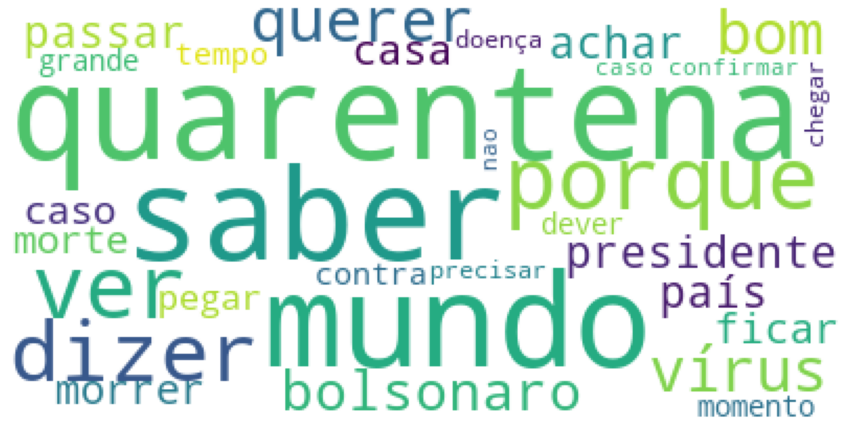

In [ ]:
# CRIAÇÃO DA PRIMEIRA NUVEM DE PALAVRAS

# Junção de todos os tweets em um único texto
texto = []
def criaTexto(text):
  text_temp = str(text)
  texto.append(text_temp)
  return texto

nuvem_palavras_1 = new_data_remove.apply(criaTexto)
new_texto = str(texto).strip('[]')

# Criação da nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_words=30, background_color='white').generate(str(new_texto))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# FINALIZANDO A CRIAÇÃO DA NUVEM DE PALAVRAS

# ----------------------------------------------------------------------------------------------

In [ ]:
# FUNÇÕES PARA TOKENIZAR, ELIMINAR STOPWORDS E LEMANTIZAR

# Função para lemantizar as palavras
def lemmatization(text):
  nlp = spacy.load('pt')
  text_temp = str(text)
  doc = nlp(text_temp)
  words_lemma = [token.lemma_ for token in doc]
  return ' '.join(words_lemma)

# Função para tokenizar e eliminar stopwords
def tokenized_words(text):
  text_temp = str(text)
  stopwords = nltk.corpus.stopwords.words('portuguese') # Stopwords
  stopwords.extend(words_remove)
  tokens = [word for word in text_temp.split() if word not in stopwords]
  return tokens

In [ ]:
# TOKENIZAÇÃO E LEMATIZAÇÃO DOS TWEETS

# Lematização dos tweets
#result_remove['full_text'] = result_remove['full_text'].apply(lemmatization)
#result_remove.to_csv('dataframe_lematizado.csv')

# Tokenização dos tweets
tokens = result_remove['full_text'].apply(tokenized_words)

print(tokens)

0                [querer, pagodearrrrrr, estranho, embora]
1                                         [esqueci, risos]
2        [assistir, programa, pauta, imaginar, gado, as...
3        [cada, atualização, morto, bater, assobio, tor...
4        [atual, crise, setor, aéreo, causar, aeronave,...
                               ...                        
26175    [urgente, oms, definir, vírus, puta, pariu, mo...
26176    [doença, provocar, novo, coronavíru, batizar, ...
26177    [nome, doença, estampar, atestado, médico, con...
26178                                    [ninguém, chamar]
26179    [doença, causar, novo, corovavírus, nome, ofic...
Name: full_text, Length: 26180, dtype: object


In [ ]:
# Construção do dicionário e do corpo do modelo
from gensim import corpora, models

dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

In [ ]:
# Treinamento do modelo LDA
ldamodel = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=8)

In [ ]:
!pip install pyLDAvis -q

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
# Visualização dos topicos 
ldamodel = ldamodel.show_topics(num_words=4)

for topic in ldamodel:
    print(topic)

(0, '0.038*"caso" + 0.017*"vírus" + 0.013*"confirmar" + 0.011*"saúde"')
(1, '0.010*"ficar" + 0.009*"saber" + 0.008*"querer" + 0.008*"casa"')
(2, '0.008*"contra" + 0.007*"corona" + 0.007*"vírus" + 0.006*"água"')
(3, '0.016*"rostochorandoderir" + 0.008*"peleclara" + 0.008*"rio" + 0.008*"\u200d"')
(4, '0.013*"saúde" + 0.011*"medida" + 0.010*"evitar" + 0.008*"novo"')
